In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/workspace/deep_birth_death/src/')

In [4]:
import pickle
import itertools
import time
import os
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from evaluation.classification import generate_class_results_calibrated_model, get_classification_results, plot_conf_mat

# Results generation

In [5]:
pickle_path = '/workspace/deep_birth_death/deep_learning/pickles/testing_k/'
res_path = "/workspace/deep_birth_death/deep_learning/models/testing_k_class/"
n_tips = ['489']
for i in n_tips:
    with open(pickle_path + "dataset_" + i + "_10k.pkl", 'rb') as f:
        data = pickle.load(f)
        
    print(data["y_class_test"].shape)

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/deep_birth_death/deep_learning/pickles/testing_k/dataset_489_10k.pkl'

In [8]:
pickle_path = '/workspace/deep_birth_death/deep_learning/pickles/testing_k_sims/'
res_path = "/workspace/deep_birth_death/deep_learning/models/testing_k_class/"

n_tips = ['674', '489', '87']

n_trees_tested = 6000
results_calibrated_model = dict()

for i in n_tips:
    with open(pickle_path + "dataset_" + i + "_10k.pkl", 'rb') as f:
        data = pickle.load(f)

    results_calibrated_model[i] = dict()
        
    model_path = res_path + i + "_classification_"

    print('---', i, 'tips ---')
    
    
    results_calibrated_model[i] = generate_class_results_calibrated_model(model_path, data['X_test'][:n_trees_tested],
                                        data['y_class_test'][:n_trees_tested])

--- 674 tips ---


/workspace/deep_birth_death/src/evaluation/classification.py:130: RuntimeWarning: overflow encountered in exp
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)
/workspace/deep_birth_death/src/evaluation/classification.py:130: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)


--- Testing time temperature model:  3.5006744861602783 seconds ---
--- 489 tips ---


/workspace/deep_birth_death/src/evaluation/classification.py:130: RuntimeWarning: overflow encountered in exp
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)
/workspace/deep_birth_death/src/evaluation/classification.py:130: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)


--- Testing time temperature model:  0.7916100025177002 seconds ---
--- 87 tips ---
--- Testing time temperature model:  0.44231390953063965 seconds ---


In [9]:
for i in n_tips:
    print(str(results_calibrated_model[i]["temperature"]))
    
    with open("/workspace/deep_birth_death/deep_learning/temperatures/temperatures_testing_k/temperature_" + i +".txt", "w") as archivo:
        archivo.write(str(results_calibrated_model[i]["temperature"]))

0.999001
1.0251364
0.9940106


# Results summary calibrated model

In [10]:
get_classification_results(results_calibrated_model)

,674,489,87
accuracy,0.9405,0.917833,0.7875
F1-Score,0.940505,0.917604,0.785614
Recall,0.940713,0.917986,0.786353
Precision,0.940484,0.91774,0.787713
Number of params,53110,14006,11446
Train time,923.648687,1349.151598,920.288027


# Confusion Matrices

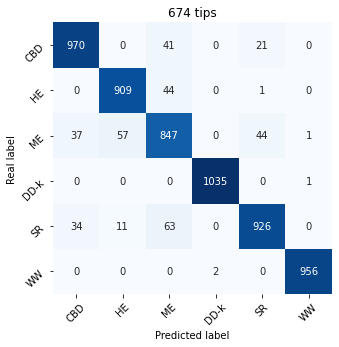

              precision    recall  f1-score   support

           0     0.9318    0.9399    0.9358      1032
           1     0.9304    0.9528    0.9415       954
           2     0.8513    0.8590    0.8551       986
           3     0.9981    0.9990    0.9986      1036
           4     0.9335    0.8956    0.9141      1034
           5     0.9979    0.9979    0.9979       958

    accuracy                         0.9405      6000
   macro avg     0.9405    0.9407    0.9405      6000
weighted avg     0.9406    0.9405    0.9405      6000



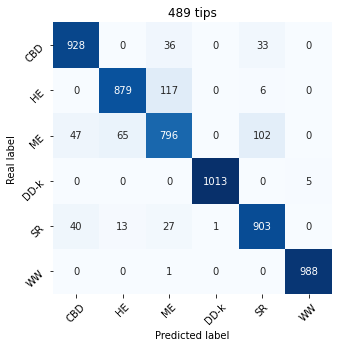

              precision    recall  f1-score   support

           0     0.9143    0.9308    0.9225       997
           1     0.9185    0.8772    0.8974      1002
           2     0.8147    0.7881    0.8012      1010
           3     0.9990    0.9951    0.9970      1018
           4     0.8649    0.9177    0.8905       984
           5     0.9950    0.9990    0.9970       989

    accuracy                         0.9178      6000
   macro avg     0.9177    0.9180    0.9176      6000
weighted avg     0.9178    0.9178    0.9176      6000



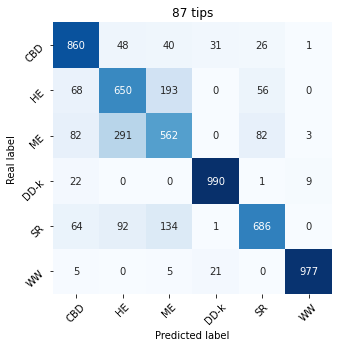

              precision    recall  f1-score   support

           0     0.7811    0.8549    0.8163      1006
           1     0.6013    0.6722    0.6348       967
           2     0.6017    0.5510    0.5752      1020
           3     0.9492    0.9687    0.9588      1022
           4     0.8061    0.7021    0.7505       977
           5     0.9869    0.9692    0.9780      1008

    accuracy                         0.7875      6000
   macro avg     0.7877    0.7864    0.7856      6000
weighted avg     0.7889    0.7875    0.7868      6000



In [12]:
label_names = ["CBD", "HE", "ME", "DD-k", "SR", "WW"]
for i in results_calibrated_model:
    plot_conf_mat((results_calibrated_model[i]["y_pred"]), (results_calibrated_model[i]["y_test"]), label_names, i)

# Train History

In [9]:
def train_plot(ax, i, metric):
    ax.plot(results[i]['history'][metric],
            linestyle='-', label='Train', color='blue', linewidth=.7)
    ax.plot(results[i]['history']['val_' + metric],
            linestyle='--', label='Validation', color='blue', linewidth=.7)
    

    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_title(i)

NameError: name 'results' is not defined

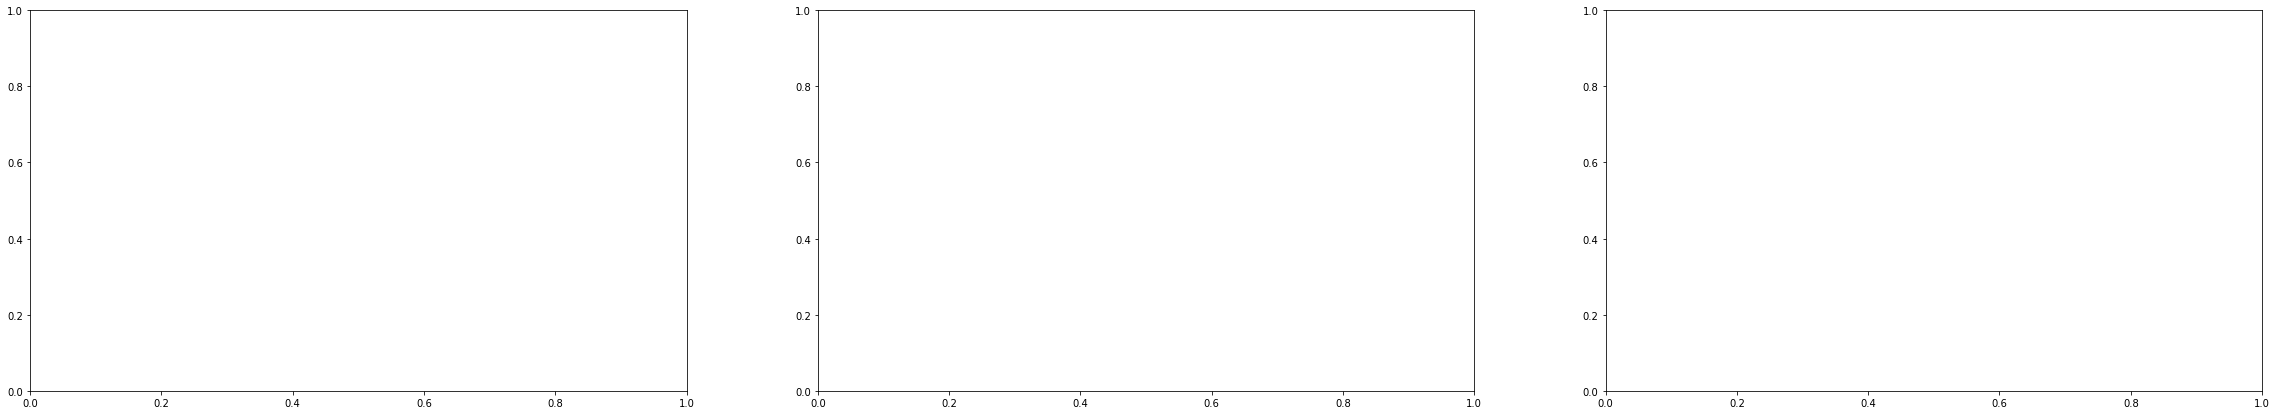

In [10]:
fig, ax = plt.subplots(1, len(n_tips), figsize=(40,7))
for i, j in enumerate(n_tips):
    train_plot(ax[i], j, 'accuracy')
    ax[i].grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

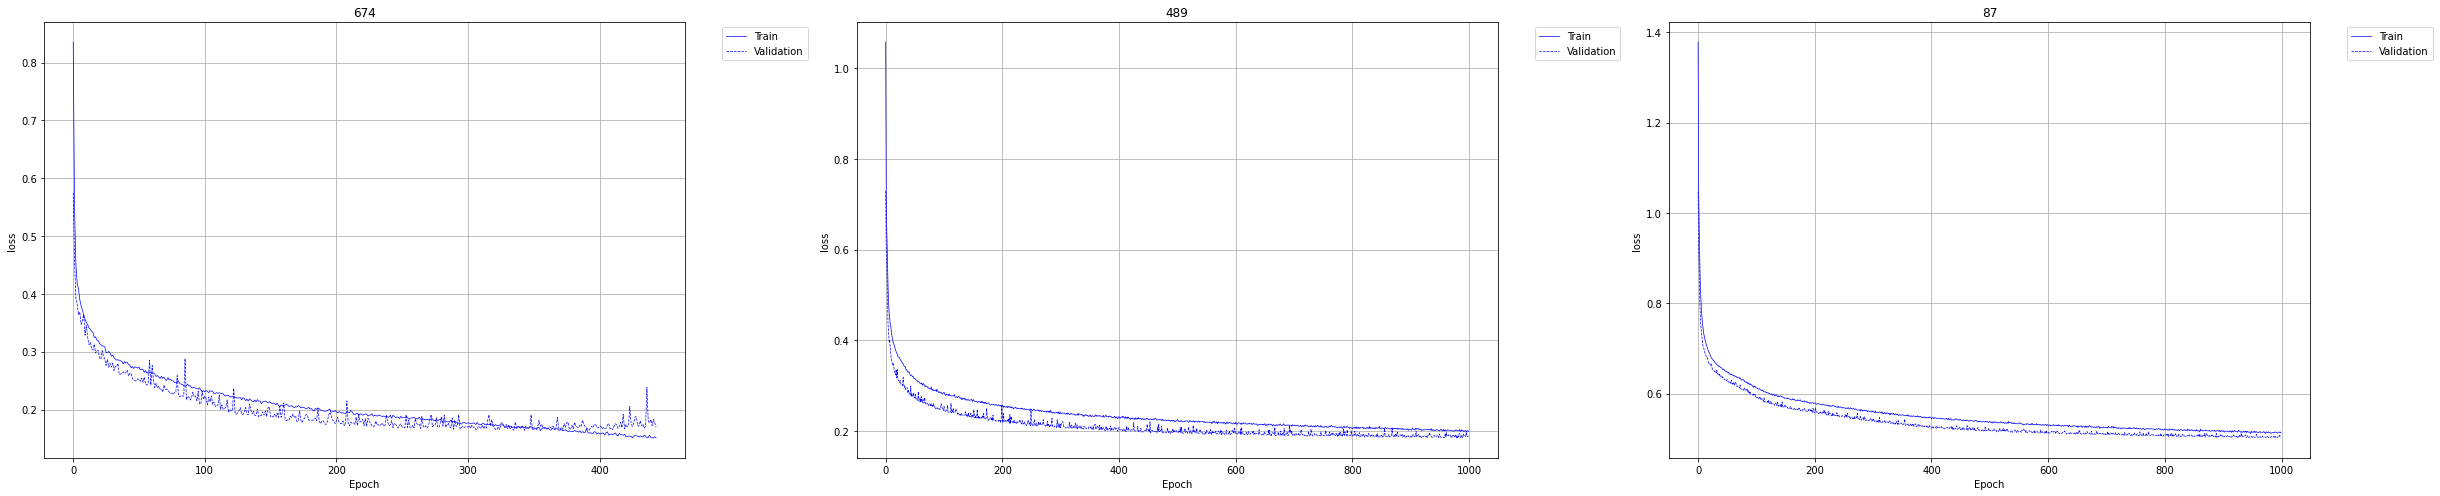

In [8]:
fig, ax = plt.subplots(1, len(n_tips), figsize=(40,7))
for i, j in enumerate(n_tips):
    train_plot(ax[i], j, 'loss')
    ax[i].grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## Results stratified

<AxesSubplot:xlabel='N_tips'>

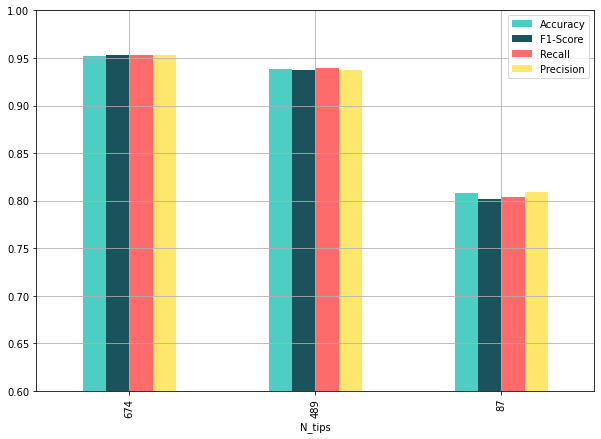

In [9]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Accuracy': [results[i]['accuracy'] for i in n_tips],
    'F1-Score': [results[i]['f1-score'] for i in n_tips],
    'Recall': [results[i]['recall'] for i in n_tips],
    'Precision': [results[i]['precision'] for i in n_tips],
})

df.plot(x="N_tips", y=["Accuracy", "F1-Score", "Recall", "Precision"], kind="bar",
        color=['#4ECDC4','#1A535C','#FF6B6B','#FFE66D'], figsize=(10,7),
        ylim=(0.6, 1), grid=True)

### Number of Params

<AxesSubplot:xlabel='N_tips'>

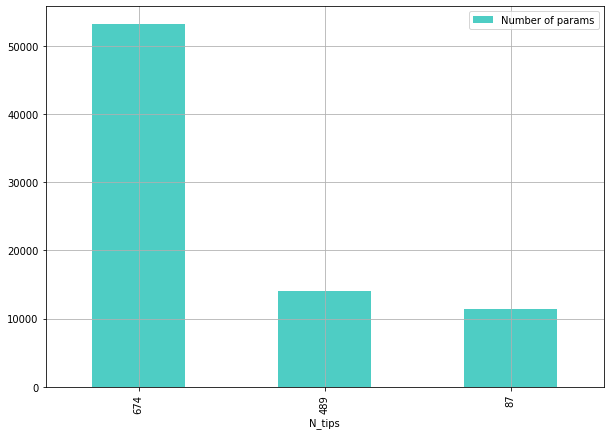

In [10]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Number of params': [results[i]['n_params'] for i in n_tips],
})

df.plot(x="N_tips", y=["Number of params"], kind="bar",
        color=['#4ECDC4'], figsize=(10,7), grid=True)

### Training time

<AxesSubplot:xlabel='N_tips'>

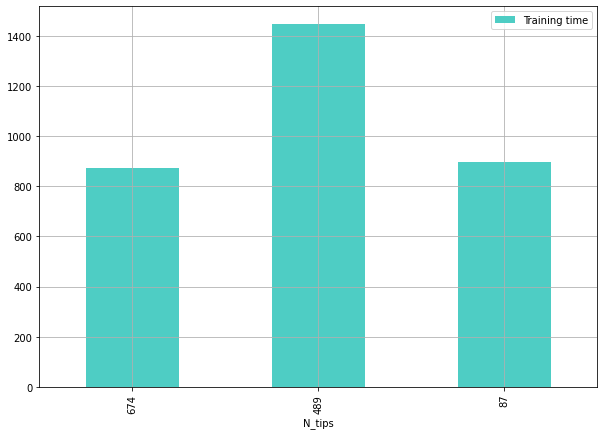

In [11]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Training time': [results[i]['train_time'] for i in n_tips],
})

df.plot(x="N_tips", y=["Training time"], kind="bar",
        color=['#4ECDC4'], figsize=(10,7), grid=True)